# Example usage of `oncosim`

The Python module `oncosim` consists of the following functions:

  1. [simulate](#simulate)
  2. [tree2dot](#tree2dot)
  3. [graph2dot](#graph2dot)
  4. [tree2freqs](#tree2freqs)
  5. [mix](#mix)
  6. [sequence](#sequence)
  7. [reads2freqs](#reads2freqs)
  8. [downsample](#downsample)

In [1]:
import sys
sys.path.insert(0, '../build/')

import oncosim
import graphviz as gv
import glob
import pandas as pd

<a name="simulate"></a>
## 1. Simulate a clone tree corresponding to a metastatic tumor

Use `oncosim.simulate` to simulate a metastatic tumor with:

* output directory equal to the current working directory (first argument set to '.').
* 10 as the random number generator seed (`'seed' : 10`), 
* a single metastasis (`'maxNrAnatomicalSites' : 1`), 
* a single sample for each anatomical site (`'nrSamplesPerAnatomicalSite' : 1, 'nrSamplesPrimary' : 1`), 
* an average sequencing depth of 160X (`'sequencingDepth' : 160`).

In [3]:
oncosim.simulate(".", {'seed' : 10,
                       'maxNrAnatomicalSites' : 1, 
                       'nrSamplesPerAnatomicalSite' : 1, 
                       'nrSamplesPrimary': 1,
                       'sequencingDepth' : 160
                      })

The above `oncosim.simulate` call results in the following files.

FILENAME | DESCRIPTION
---------|-------------
clustering_observed_seed10.txt | Each line of this files specifies a mutation cluster, composed of mutations separated by ';'
T_seed10.dot | Graphviz visualization of the simulated clone tree
G_seed10.dot | Graphviz visualization of the simulated migration graph
T_seed10.tree | Simulated clone tree
G_seed10.graph | Simulated migration graph
reads_seed10.tsv | Simulated read matrix
drivers_seed10.txt | List of driver mutation, one per line
T_seed10.vertex.labeling | Simulated vertex labeling

In [4]:
glob.glob("*seed10.*")

['clustering_observed_seed10.txt',
 'T_seed10.dot',
 'G_seed10.dot',
 'T_seed10.tree',
 'T_sampled_seed10.tree',
 'R_sampled_seed10.tsv',
 'T_sampled_seed10.dot',
 'G_seed10.graph',
 'reads_seed10.tsv',
 'drivers_seed10.txt',
 'F_sampled_seed10.tsv',
 'F_seed10.tsv',
 'T_seed10.vertex.labeling']

<a name="tree2dot"></a>
## 2. Visualize simulated clone tree

Use `oncosim.tree2dot` to visualize the simulated clone tree (`T_seed10.tree`) and vertex labeling (`T_seed10.vertex.labeling`) using Graphviz. The second argument is the filename containing the color map -- and if left empty, a color map will be generated.

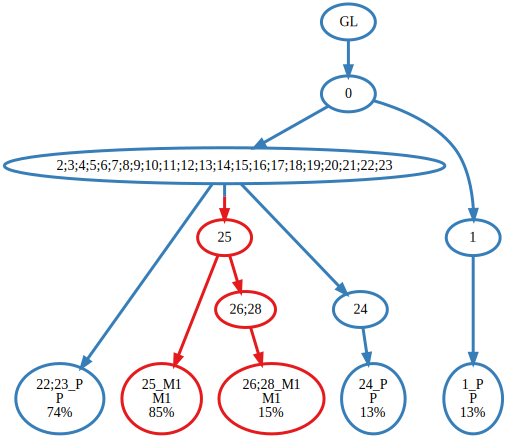

In [5]:
gv.Source(oncosim.tree2dot("T_seed10.tree", "", "T_seed10.vertex.labeling"))

<a name="graph2dot"></a> 
## 3. Visualize simulated migration graph

Use `oncosim.graph2dot` to visualize the simulated migration graph (`G_seed10.graph`) using Graphviz. The second argument is optional and specifies the filename containing the color map.

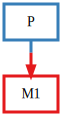

In [6]:
gv.Source(oncosim.graph2dot("G_seed10.graph"))

<a name="tree2freqs"></a> 
## 4. Extract mutation frequencies from clone tree

Use `oncosim.tree2freqs` to extract mutation frequencies from a clone tree. The first argument of this function is the clone tree and the second argument is the frequency output file.

In [7]:
oncosim.tree2freqs("T_seed10.tree", "F_seed10.tsv")

In [8]:
df = pd.read_csv("F_seed10.tsv", skiprows=3, sep="\t")
df.head()

,#sample_index,sample_label,anatomical_site_index,anatomical_site_label,character_index,character_label,f-,f+
0,0,M1_0,0,M1,0,0,0,0
1,0,M1_0,0,M1,1,1,0,0
2,0,M1_0,0,M1,2,10,0,0
3,0,M1_0,0,M1,3,11,0,0
4,0,M1_0,0,M1,4,12,0,0


<a name="mix"></a> 
## 5. Generate samples as mixtures of clone tree leaves 

Use `oncosim.mix` to generate a new clone tree, whose samples will correspond to mixtures of the leaves of the original clone tree. The first argument of the `oncosim.mix` function is the input clone tree, then the output clone tree followed by the number of samples that are generated for each location, and finally the random number generator seed.

In [9]:
oncosim.mix("T_seed10.tree", "T_sampled_seed10.tree", 2, 0)

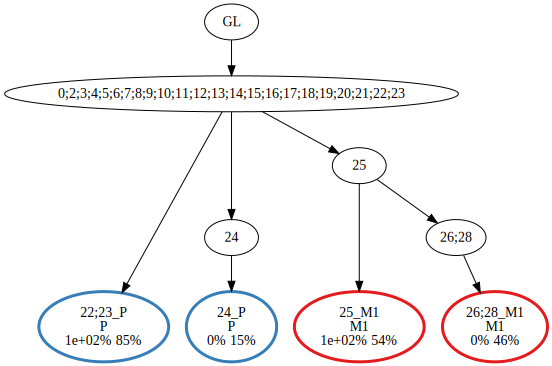

In [10]:
gv.Source(oncosim.tree2dot("T_sampled_seed10.tree"))

<a name="sequence"></a>
## 6. Generate a read matrix from a given clone tree

Use `oncosim.sequence` to generate a read matrix. The first argument is the clone tree, followed by the filename of the output read matrix, and finally the desired sequencing coverage.

In [11]:
oncosim.sequence("T_sampled_seed10.tree", "R_sampled_seed10.tsv", 160)

In [12]:
df = pd.read_csv("R_sampled_seed10.tsv", skiprows=3, sep="\t")
df.head()

,#sample_index,sample_label,anatomical_site_index,anatomical_site_label,character_index,character_label,ref,var
0,0,M1_0,0,M1,0,0,163,0
1,0,M1_0,0,M1,1,10,160,0
2,0,M1_0,0,M1,2,11,179,0
3,0,M1_0,0,M1,3,12,158,0
4,0,M1_0,0,M1,4,13,137,0


<a name="reads2freqs"></a>
## 7. Generate a frequency interval matrix from a given read matrix

Use `oncosim.reads2freqs` to generate a frequency confidence interval matrix.

In [13]:
oncosim.reads2freqs("R_sampled_seed10.tsv", "F_sampled_seed10.tsv", 0.05)

In [14]:
df = pd.read_csv("F_sampled_seed10.tsv", skiprows=3, sep="\t")
df.head()

,#sample_index,sample_label,anatomical_site_index,anatomical_site_label,character_index,character_label,f-,f+
0,0,M1_0,0,M1,0,0,0.0,0
1,0,M1_0,0,M1,1,10,0.0,0
2,0,M1_0,0,M1,2,11,0.0,0
3,0,M1_0,0,M1,3,12,0.0,0
4,0,M1_0,0,M1,4,13,0.0,0


<a name="downsample"></a>
## 8. Downsampling a read matrix

Use `oncosim.downSample` to downsample a given read matrix. The first argument is the input read matrix, the second argument is the output read matrix, then the number of samples per location is specified (-1 keeps the current samples), followed by the sequencing coverage.

In [15]:
oncosim.downsample("R_sampled_seed10.tsv", "R_downsampled_seed10.tsv", -1, 60)

In [16]:
df = pd.read_csv("R_downsampled_seed10.tsv", skiprows=3, sep="\t")
df.head()

,#sample_index,sample_label,anatomical_site_index,anatomical_site_label,character_index,character_label,ref,var
0,0,M1_0,0,M1,0,20,59,0
1,0,M1_0,0,M1,1,24,59,0
2,0,M1_0,0,M1,2,6,61,0
3,0,M1_0,0,M1,3,12,72,0
4,0,M1_0,0,M1,4,16,61,0
